In [1]:
## CNN_Flowers_classi.ipynb

In [56]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.optimizers import SGD

# Image data preprocessing

ImageDataGenerator (Data Augumentation)

In [57]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)
test_datagen = ImageDataGenerator(
    rescale=1/255,
)

In [58]:
batch_size = 128

# Notice the tiny target size, just 32x32!
train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/CNN/flower_Image_data/train_flower',
    target_size=(32, 32),
    batch_size=batch_size,
    class_mode='categorical'
)
validation_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/CNN/flower_Image_data/test_flower',
    target_size=(32, 32),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 330 images belonging to 2 classes.
Found 66 images belonging to 2 classes.


# Modeling

In [59]:
# model = Sequential()
# #model.add(prior)
# model.add(Flatten())
# model.add(Dense(256, activation='relu', name='Dense_Intermediate'))
# model.add(Dropout(0.1, name='Dropout_Regularization'))
# model.add(Dense(12, activation='sigmoid', name='Output'))

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(2, activation='softmax'))

In [60]:
#opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# model.compile(
#     optimizer=RMSprop(),
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)         

**Fit the Model**

In [62]:
# fit the model
r = model.fit_generator(train_generator,
                        validation_data=validation_generator,
                        epochs=50,
                        steps_per_epoch=len(train_generator),
                        validation_steps=len(validation_generator),
                        #callbacks=[
        #EarlyStopping(patience=3, restore_best_weights=True),
        #ReduceLROnPlateau(patience=2)]
                        )

Epoch 1/50
3/3 [==============================] - 5s 2s/step - loss: 3.9459 - accuracy: 0.4667 - val_loss: 0.8083 - val_accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 5s 2s/step - loss: 0.9888 - accuracy: 0.5000 - val_loss: 0.6868 - val_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 5s 2s/step - loss: 0.7115 - accuracy: 0.5030 - val_loss: 0.6873 - val_accuracy: 0.6061
Epoch 4/50
3/3 [==============================] - 5s 2s/step - loss: 0.6895 - accuracy: 0.5394 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 5/50
3/3 [==============================] - 5s 2s/step - loss: 0.6977 - accuracy: 0.5061 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 6/50
3/3 [==============================] - 5s 2s/step - loss: 0.6945 - accuracy: 0.4970 - val_loss: 0.6905 - val_accuracy: 0.5303
Epoch 7/50
3/3 [==============================] - 5s 2s/step - loss: 0.6856 - accuracy: 0.5939 - val_loss: 0.6859 - val_accuracy: 0.7879
Epoch 8/50
3/3 [=========================

In [47]:
# # save model
# model.save('my_flower_classi_model')

# Prediction

Class [0] means it is a 'Lotus Image'

Class [1] means it is a 'Rose Image'

Load Image

In [67]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
image = image.load_img('/content/drive/My Drive/CNN/flower_Image_data/validate_flower_image/image_01164.jpg', target_size=(32, 32))
input_arr = keras.preprocessing.image.img_to_array(image)
#x = np.expand_dims(input_arr, axis=0)   ## Convert single image to a batch.
input_arr = np.array([input_arr])        ## Convert single image to a batch.
#predictions = model.predict(input_arr)

 

**Load Model**

In [68]:
# load model
#model = load_model('my_flower_classi_model')
predictions_classes = model.predict_classes(input_arr)

def predict_img():
  if predictions_classes ==0:
    print("Class {} means it is a 'Lotus Image'".format(predictions_classes))
  if predictions_classes ==1:
    print("Class {} means it is a 'Rose Image'".format(predictions_classes)) 

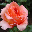

In [69]:
image

In [70]:
predict_img()

Class [1] means it is a 'Rose Image'
